**Hierarchical Clustering:**

This method was used to group stores based on their performance metrics (unit_sales, transactions, promotions, oil_price). The dendrogram visualizes how stores cluster based on similarity.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the preprocessed dataset
data = pd.read_csv('/content/preprocessed_data.csv')

# Display the first few rows to understand its structure
data.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,transactions,holiday_type,holiday_scope,location,transferred,holiday_description,oil_price,family,perishable,store_city,store_state,store_type,store_cluster,is_return
0,119882896,2017-06-23,44,939663,2.0,0,4465.0,Holiday,Local,Guaranda,0,Cantonization of Guaranda,42.86,GROCERY I,0,Quito,Pichincha,A,5,0
1,113178951,2017-04-21,43,2026893,2.0,0,1373.0,Holiday,Local,Riobamba,0,Cantonization of Riobamba,49.64,GROCERY I,0,Esmeraldas,Esmeraldas,E,10,0
2,125043190,2017-08-11,38,2010233,1.0,0,1577.0,Transfer,National,Ecuador,0,Relocation of First Cry of Independence,48.81,GROCERY I,0,Loja,Loja,D,4,0
3,88996056,2016-08-24,53,1975578,2.0,0,1259.0,Holiday,Local,Ambato,0,Foundation of Ambato,46.29,GROCERY I,0,Manta,Manabi,D,13,0
4,98298830,2016-11-28,45,1160754,10.0,0,3356.0,Event,National,Ecuador,0,Cyber Monday,45.66,GROCERY I,0,Quito,Pichincha,A,11,0


In [ ]:
# Drop non-numeric columns
data_clustering = data[['store_nbr', 'item_nbr', 'unit_sales', 'onpromotion', 'transactions', 'oil_price']]

# Fill missing values (you could use mean or median, here we use mean)
data_clustering.fillna(data_clustering.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

<ipython-input-3-069d49046484>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clustering.fillna(data_clustering.mean(), inplace=True)


In [ ]:
# Perform hierarchical clustering
linked = linkage(data_scaled, method='ward')

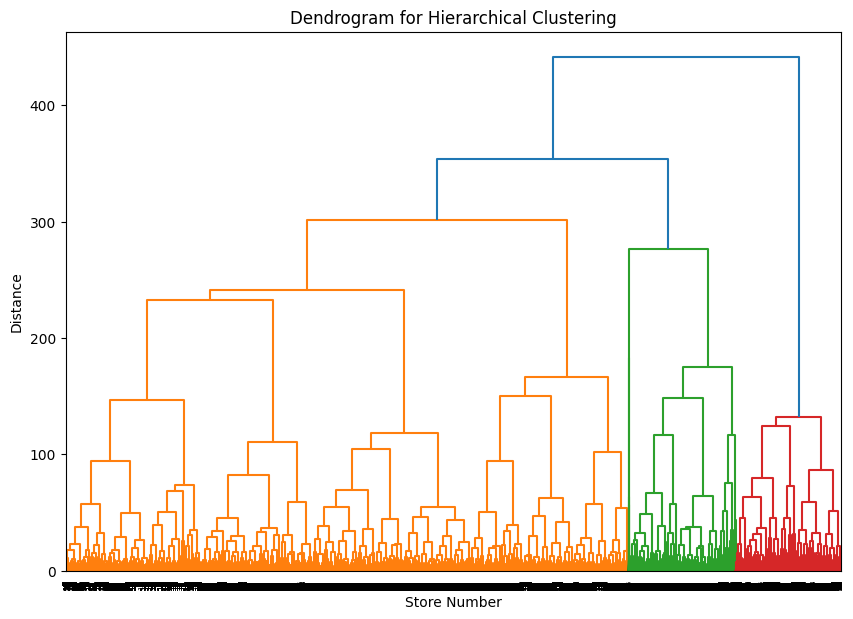

In [ ]:
# Create a dendrogram to visualize clustering on str_number
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=data['store_nbr'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Store Number')
plt.ylabel('Distance')
plt.show()

Key Insights from the Clustering:

  •	Orange Cluster: The largest group, representing stores with similar sales patterns, promotions, and responses to factors like oil prices.
  
  •	Green Cluster: Stores in this cluster exhibit slightly different operational patterns, potentially due to regional or strategic differences.
  
  •	Blue Cluster: Stores with distinctly different characteristics, likely due to unique business models, customer bases, or external influences.
  
  •	Red Cluster: Outliers in terms of sales and promotions, potentially influenced by special events, irregular transaction volumes, or other anomalous factors.

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Set the maximum distance for the clusters
max_distance = 100  # Adjust based on your dendrogram
clusters = fcluster(linked, max_distance, criterion='distance')

# Add the cluster assignments to the dataset
data['cluster'] = clusters

In [ ]:
# Group by clusters and calculate summary statistics
cluster_summary = data.groupby('cluster').agg({
    'unit_sales': ['mean', 'std'],
    'onpromotion': ['mean', 'std'],
    'transactions': ['mean', 'std'],
    'oil_price': ['mean', 'std']
})

# Display the cluster summary
print(cluster_summary)

          unit_sales             onpromotion           transactions  \
                mean         std        mean       std         mean   
cluster                                                               
1           7.880807    9.073399    1.000000  0.000000  1370.223684   
2          26.181860   28.365368    1.000000  0.000000  3360.661398   
3           8.244525    9.422933    1.000000  0.000000  1679.042059   
4         170.975573   54.687205    0.343949  0.475783  2540.566879   
5          51.776238   26.961593    0.000000  0.000000  2627.352136   
6           7.233390    6.440046    0.000000  0.000000  3448.784038   
7          15.682448   18.590920    0.185624  0.388957  6875.194313   
8           9.239832    9.338757    0.000000  0.000000  3883.513900   
9        1922.828600  516.430371    0.200000  0.447214  3613.000000   
10        481.186234  157.348733    0.375000  0.487950  3327.265625   
11          6.060692    6.412502    0.000000  0.000000  2202.207811   
12    

**GMM**

Grocery Sales Clustering with GMM

Use GMM to categorize items and stores into distinct clusters based on purchasing patterns

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

<ipython-input-22-115239c2e5bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.mean(), inplace=True)


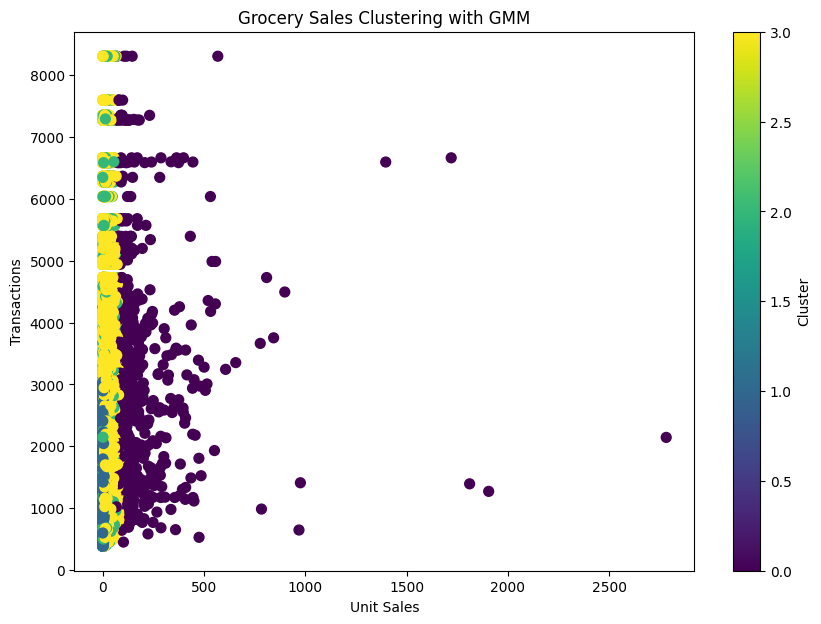

In [22]:
# Select relevant features for clustering (store and item-level features)
features = data[['unit_sales', 'transactions', 'onpromotion', 'oil_price']]  # You can add temporal features here as needed

# Handle missing values by filling with the mean
features.fillna(features.mean(), inplace=True)

# Standardize the features for clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply GMM clustering
k = 4  # Adjust the number of clusters based on the analysis
gmm = GaussianMixture(n_components=k, random_state=42)
gmm.fit(features_scaled)

# Predict the cluster labels
labels = gmm.predict(features_scaled)

# Add cluster labels to the dataset
data['Cluster'] = labels

# Visualize the clusters on a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(data['unit_sales'], data['transactions'], c=data['Cluster'], cmap='viridis', s=50)
plt.title('Grocery Sales Clustering with GMM')
plt.xlabel('Unit Sales')
plt.ylabel('Transactions')
plt.colorbar(label='Cluster')
plt.show()

Scatter plot for clustering in 3D

<ipython-input-26-290d51da5beb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.mean(), inplace=True)


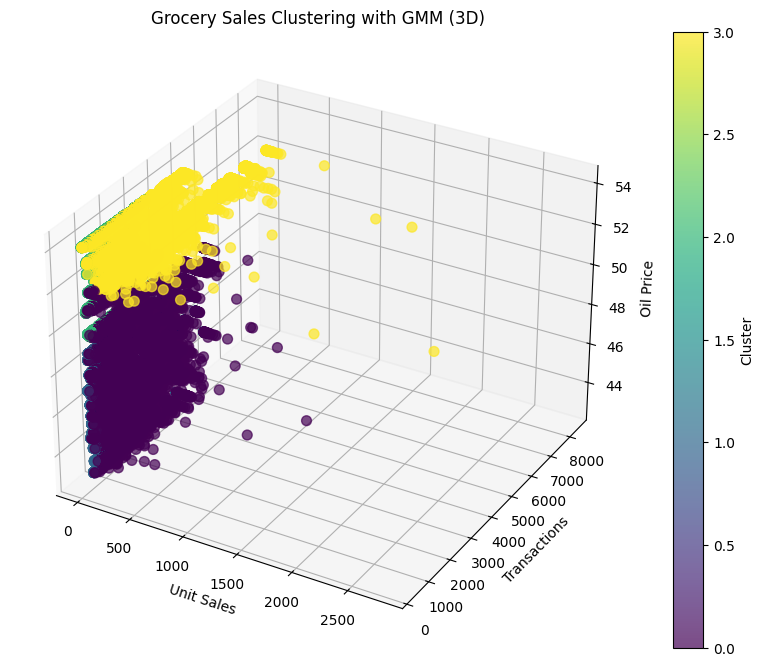

In [26]:
# Select relevant features for clustering (store and item-level features)
features = data[['unit_sales', 'transactions', 'oil_price']]  # You can add temporal features here as needed

# Handle missing values by filling with the mean
features.fillna(features.mean(), inplace=True)

# Log transform the features to handle large range
features_log = features.copy()
features_log['unit_sales'] = np.log1p(features_log['unit_sales'])
features_log['transactions'] = np.log1p(features_log['transactions'])
features_log['oil_price'] = np.log1p(features_log['oil_price'])

# Standardize the features for clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_log)

# Apply GMM clustering
k = 4  # Adjust the number of clusters based on the analysis
gmm = GaussianMixture(n_components=k, random_state=42)
gmm.fit(features_scaled)

# Predict the cluster labels
labels = gmm.predict(features_scaled)

# Add cluster labels to the dataset
data['Cluster'] = labels

# Create a 3D scatter plot to visualize the clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the clusters in 3D (using unit_sales, transactions, and oil_price)
sc = ax.scatter(data['unit_sales'], data['transactions'], data['oil_price'], c=data['Cluster'], cmap='viridis', s=50, alpha=0.7)

# Adding labels and title
ax.set_title('Grocery Sales Clustering with GMM (3D)')
ax.set_xlabel('Unit Sales')
ax.set_ylabel('Transactions')
ax.set_zlabel('Oil Price')

# Add color bar
plt.colorbar(sc, label='Cluster')

# Show the plot
plt.show()

Grocery Sales Clustering using Gaussian Mixture Model (GMM) with Logarithmic Transformation

<ipython-input-19-fdfbb709672c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.mean(), inplace=True)


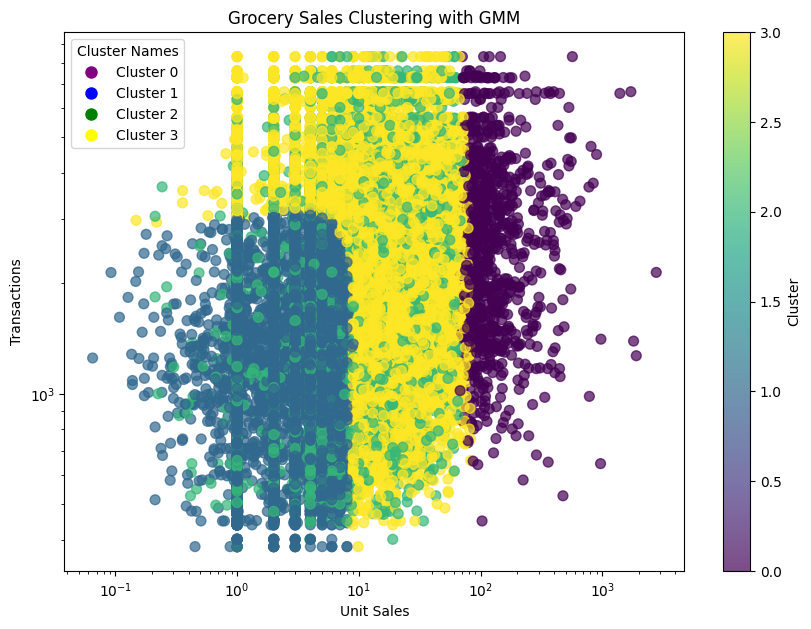

In [19]:
# Select relevant features for clustering (store and item-level features)
features = data[['unit_sales', 'transactions', 'onpromotion', 'oil_price']]  # Add more features as necessary

# Handle missing values by filling with the mean
features.fillna(features.mean(), inplace=True)

# Standardize the features for clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply GMM clustering
k = 4  # Number of clusters
gmm = GaussianMixture(n_components=k, random_state=42)
gmm.fit(features_scaled)

# Predict the cluster labels
labels = gmm.predict(features_scaled)

# Add cluster labels to the dataset
data['Cluster'] = labels

# Map each cluster label to a specific name and color based on the image provided
cluster_names = {
    0: 'Cluster 0 (Purple)',
    1: 'Cluster 1 (Blue)',
    2: 'Cluster 2 (Green)',
    3: 'Cluster 3 (Yellow)',
}

# Map the cluster labels to names
data['Cluster Name'] = data['Cluster'].map(cluster_names)

# Adjusting plot style and color mapping to enhance visibility of clusters
plt.figure(figsize=(10, 7))

# Apply log transformation to better separate the clusters in the plot
scatter = plt.scatter(data['unit_sales'], data['transactions'], c=data['Cluster'], cmap='viridis', s=50, alpha=0.7)

# Add title and labels
plt.title('Grocery Sales Clustering with GMM')
plt.xlabel('Unit Sales')
plt.ylabel('Transactions')

# Set the x and y axes to log scale (to handle large range of values)
plt.xscale('log')
plt.yscale('log')

# Add a colorbar for cluster labeling
plt.colorbar(label='Cluster')

# Add custom legend with cluster names and colors
import matplotlib.lines as mlines

cluster_legend = [
    (0, 'purple'),
    (1, 'blue'),
    (2, 'green'),
    (3, 'yellow')
]

handles = [mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {i}') for i, color in cluster_legend]
plt.legend(handles=handles, title="Cluster Names")

# Show the plot
plt.show()

**Pattern Mining**

Using Frequent Pattern Mining to identify
1. Average Sales by Holiday Type During Promotions
2. Top 10 Items Sold During Promotions
3. ⁠Promotion vs Non-Promotion Sales Comparison
4. Sales During Promotions vs Non-Promotions by Store Location and Typ


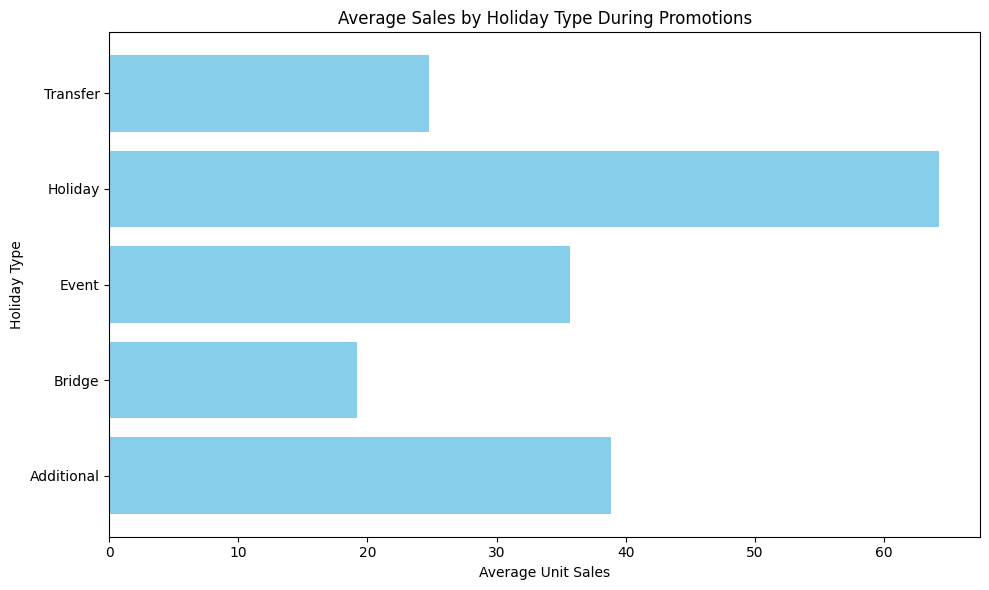

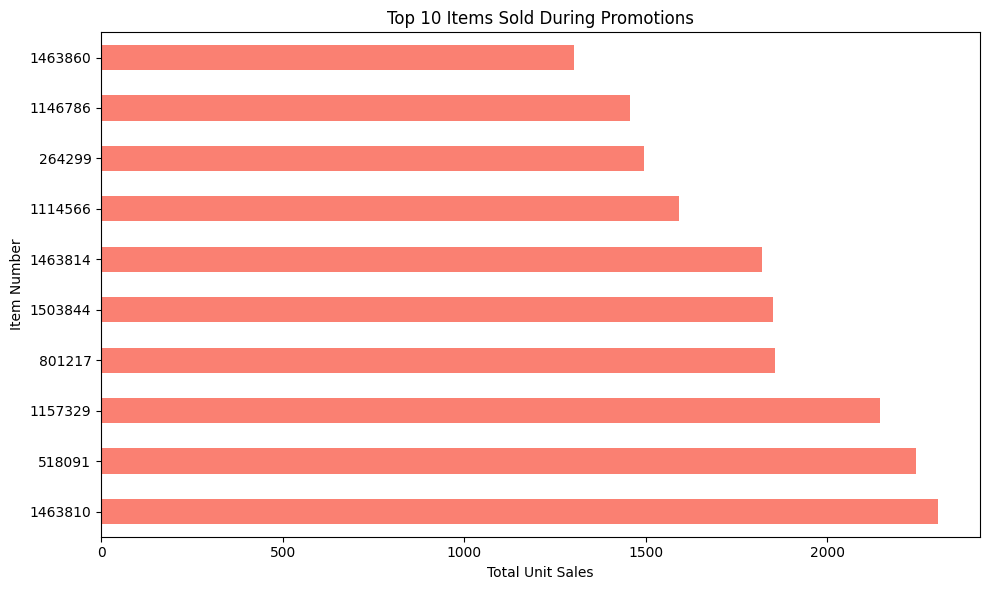

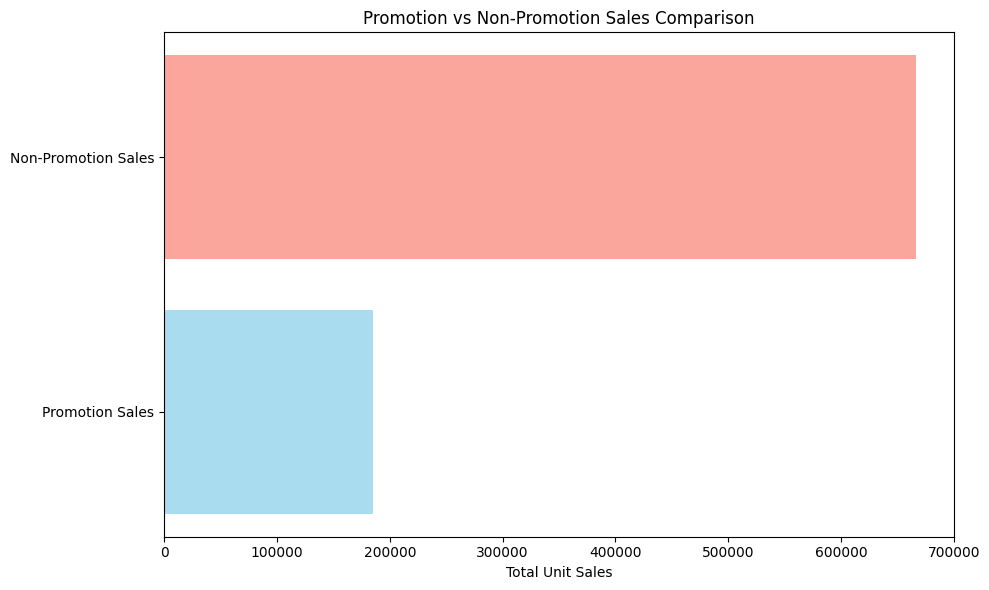

In [27]:
# Convert the 'date' column to datetime format for analysis
data['date'] = pd.to_datetime(data['date'])

# Filter the data to focus on relevant information (promotions, holidays, unit_sales)
promotion_data = data[data['onpromotion'] == 1]

# Group by 'holiday_type', 'item_nbr', and 'unit_sales' to analyze trends
promotion_sales = promotion_data.groupby(['holiday_type', 'item_nbr'])['unit_sales'].sum().reset_index()

# Analyze sales trends per holiday type
holiday_sales = promotion_sales.groupby('holiday_type')['unit_sales'].mean().reset_index()

# Visualize the sales trends during different holiday types as a horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(holiday_sales['holiday_type'], holiday_sales['unit_sales'], color='skyblue')
plt.xlabel('Average Unit Sales')
plt.ylabel('Holiday Type')
plt.title('Average Sales by Holiday Type During Promotions')
plt.tight_layout()
plt.show()

# Identify high-selling items during promotions
top_items = promotion_sales.groupby('item_nbr')['unit_sales'].sum().sort_values(ascending=False).head(10)

# Visualize the top 10 selling items during promotions as a horizontal bar graph
plt.figure(figsize=(10, 6))
top_items.plot(kind='barh', color='salmon')
plt.xlabel('Total Unit Sales')
plt.ylabel('Item Number')
plt.title('Top 10 Items Sold During Promotions')
plt.tight_layout()
plt.show()

# Filter data for promotion vs non-promotion
promotion_sales_data = data[data['onpromotion'] == 1]
non_promotion_sales_data = data[data['onpromotion'] == 0]

# Aggregate sales for promotion vs non-promotion
promotion_sales = promotion_sales_data.groupby('onpromotion')['unit_sales'].sum().reset_index()
non_promotion_sales = non_promotion_sales_data.groupby('onpromotion')['unit_sales'].sum().reset_index()

# Prepare the labels for the bars
labels = ['Promotion Sales', 'Non-Promotion Sales']

# Values for the horizontal bars
values = [promotion_sales['unit_sales'].sum(), non_promotion_sales['unit_sales'].sum()]

# Plot the data as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(labels, values, color=['skyblue', 'salmon'], alpha=0.7)
plt.xlabel('Total Unit Sales')
plt.title('Promotion vs Non-Promotion Sales Comparison')
plt.tight_layout()
plt.show()

<ipython-input-28-22b9092a8c7f>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(data['store_type'].unique()))  # Using a predefined color map


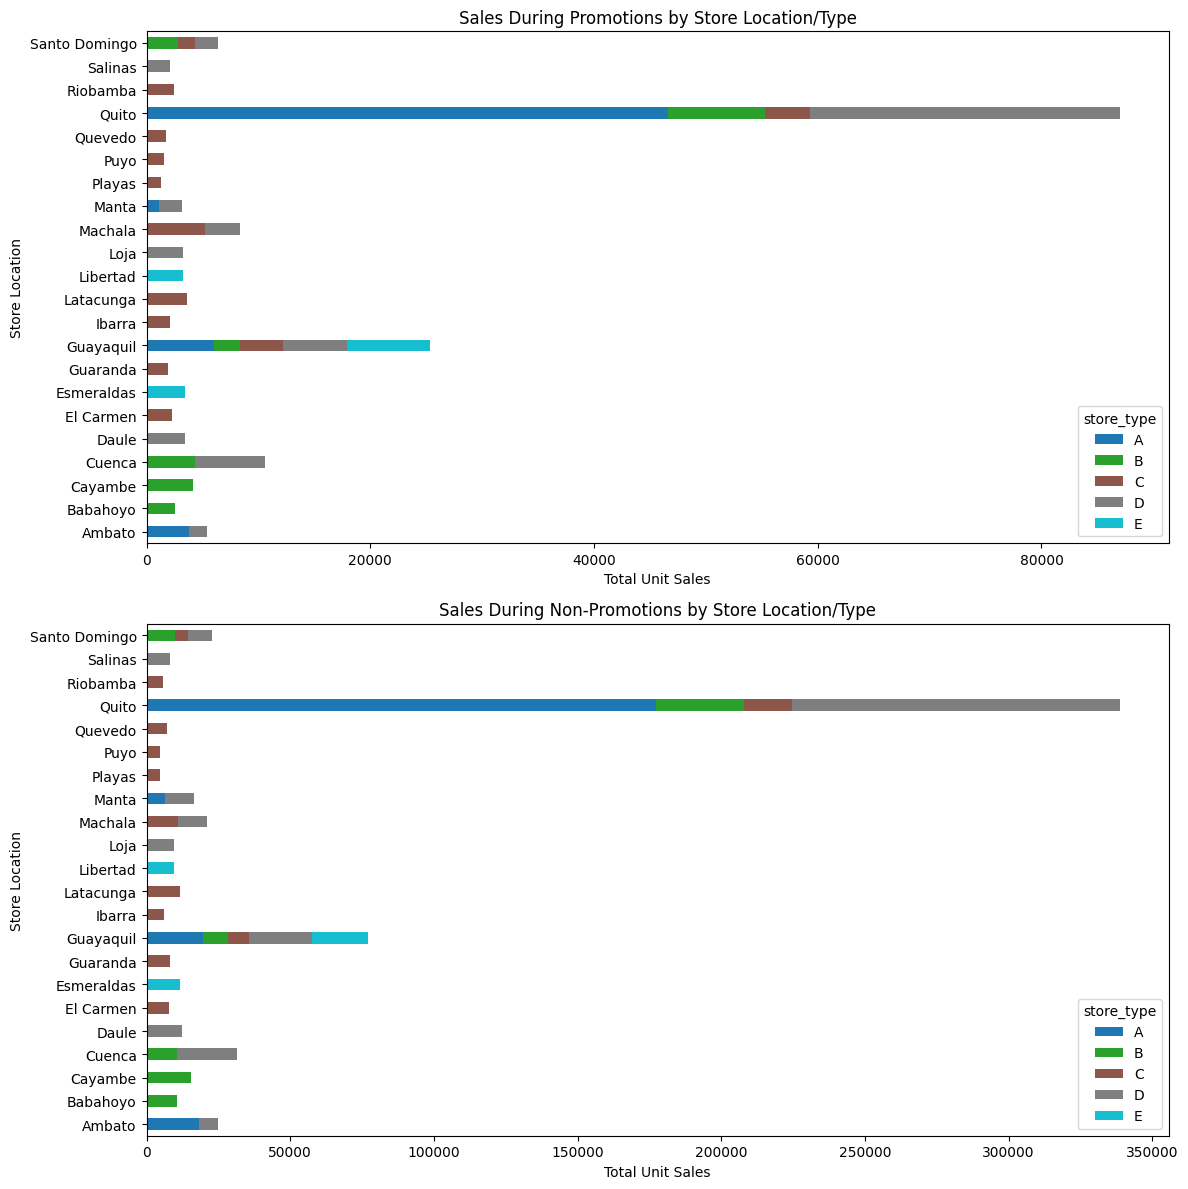

In [28]:
# Group by 'store_city', 'store_type', and 'onpromotion' to analyze sales trends by store type/location and promotions
location_sales = data.groupby(['store_city', 'store_type', 'onpromotion'])['unit_sales'].sum().reset_index()

# Create a color map for different store types
colors = plt.cm.get_cmap('tab10', len(data['store_type'].unique()))  # Using a predefined color map

# Filter data for stores with promotions (onpromotion == 1) and those without (onpromotion == 0)
promotion_sales_data = location_sales[location_sales['onpromotion'] == 1]
non_promotion_sales_data = location_sales[location_sales['onpromotion'] == 0]

# Plot sales during promotions vs non-promotions by store location and type
plt.figure(figsize=(12, 12))

# Plot sales during promotions by store location and type (top chart)
plt.subplot(2, 1, 1)
promotion_sales_data.pivot_table(index='store_city', columns='store_type', values='unit_sales', aggfunc='sum').plot(kind='barh', stacked=True, ax=plt.gca(), color=colors(range(len(data['store_type'].unique()))))
plt.title('Sales During Promotions by Store Location/Type')
plt.xlabel('Total Unit Sales')
plt.ylabel('Store Location')

# Plot sales during non-promotions by store location and type (bottom chart)
plt.subplot(2, 1, 2)
non_promotion_sales_data.pivot_table(index='store_city', columns='store_type', values='unit_sales', aggfunc='sum').plot(kind='barh', stacked=True, ax=plt.gca(), color=colors(range(len(data['store_type'].unique()))))
plt.title('Sales During Non-Promotions by Store Location/Type')
plt.xlabel('Total Unit Sales')
plt.ylabel('Store Location')

plt.tight_layout()
plt.show()

In [30]:
# Pivot the data for both promotion and non-promotion sales
pivot_promotion_sales = promotion_sales_data.pivot_table(index=['store_city', 'store_type'], values='unit_sales', aggfunc='sum').rename(columns={'unit_sales': 'Promotion Sales'})
pivot_non_promotion_sales = non_promotion_sales_data.pivot_table(index=['store_city', 'store_type'], values='unit_sales', aggfunc='sum').rename(columns={'unit_sales': 'Non-Promotion Sales'})

# Merge the two pivot tables
combined_sales = pd.merge(pivot_promotion_sales, pivot_non_promotion_sales, left_index=True, right_index=True, how='outer').fillna(0)

# Display the combined sales table
print(combined_sales)

                          Promotion Sales  Non-Promotion Sales
store_city    store_type                                      
Ambato        A                  3813.424            18417.337
              D                  1579.095             6571.381
Babahoyo      B                  2588.282            10747.825
Cayambe       B                  4139.076            15350.132
Cuenca        B                  4323.173            10584.929
              D                  6260.156            20848.603
Daule         D                  3412.483            12218.236
El Carmen     C                  2286.684             7972.100
Esmeraldas    E                  3449.273            11685.849
Guaranda      C                  1952.552             8272.275
Guayaquil     A                  6047.913            19500.788
              B                  2334.103             8967.088
              C                  3786.059             7193.841
              D                  5767.063            21